In [1]:
# useer_id:用户id,order_dt:购买日期，order_products:购买金额
# 数据时间：1997.1-1998.6用户行为数据，约6万

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
plt.style.use('ggplot') #更改绘图风格，R语言绘图库的风格
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
# 导入数据：没有列头 所以需要定义列头
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\CDNOW_master.txt",names=columns,sep='\s+')#sep='\s+匹配任意空格，是数据的分割符
df.head()
#将近7万条数据
#日期格式需要转换
#存在同一个用户一天内购买多次行为

user_id  order_dt  order_products  order_amount
0        1  19970101               1         11.77
1        2  19970112               1         12.00
2        2  19970112               5         77.00
3        3  19970102               2         20.76
4        3  19970330               2         20.76

In [4]:
df.describe()

user_id      order_dt  order_products  order_amount
count  69659.000000  6.965900e+04    69659.000000  69659.000000
mean   11470.854592  1.997228e+07        2.410040     35.893648
std     6819.904848  3.837735e+03        2.333924     36.281942
min        1.000000  1.997010e+07        1.000000      0.000000
25%     5506.000000  1.997022e+07        1.000000     14.490000
50%    11410.000000  1.997042e+07        2.000000     25.980000
75%    17273.000000  1.997111e+07        3.000000     43.700000
max    23570.000000  1.998063e+07       99.000000   1286.010000

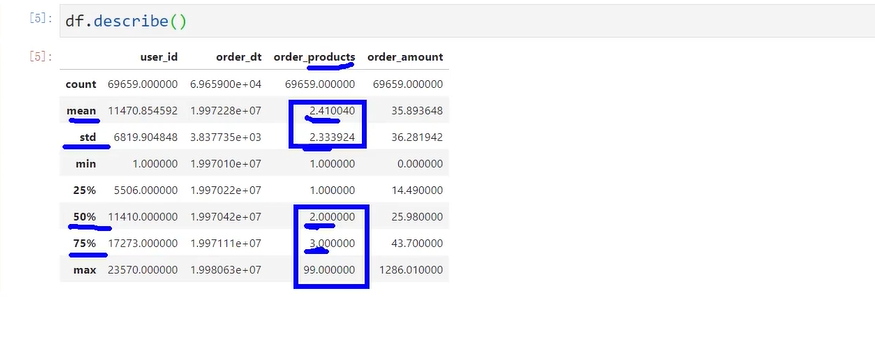
- 说明绝大多数的购买量不多，购买2、3件
- 用户平均每笔订单购买2，4件商品，标准差是2.3稍微有点波动，属于正常
- 然鹅75%分位数的时候，说明绝大多数订单购买量都不多，围绕在2-3个产品左右
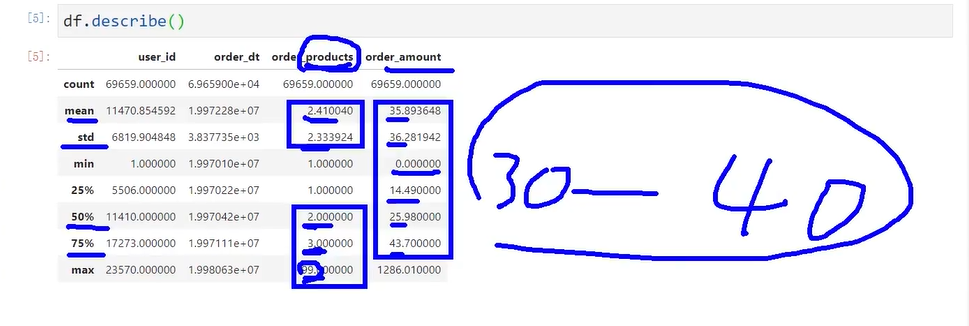
- 说明大多数人的消费金额在30-40之间，购买金额反映出大部分订单消费金额金钟在中小额，30-45左右

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


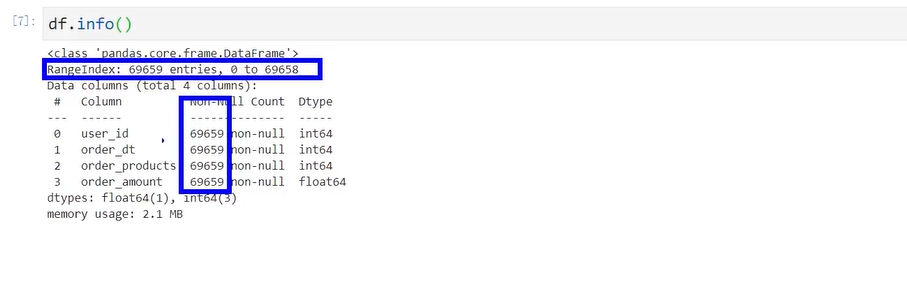
- 说明数据没有空值
- 并且时间是int型，需要进行数据类型转换


#### 数据预处理

In [3]:
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d') #将其转换为日期类型
#format参数：按照指定格式取匹配转换的数据列
#%Y:四位的年份1994   %m:两位的月份05  %d:两位日31
#%y:两位年份94   %h:两位小时09  %M:两位分钟15  %s:两位秒
#df
#df.info() #可以知道已经转化成功
#将order_date转换为精度为月份的数据列
df['month']=df['order_date'].values.astype('datetime64[M]') #[M]：控制转换后的精度
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


user_id  order_dt  order_products  order_amount order_date      month
0        1  19970101               1         11.77 1997-01-01 1997-01-01
1        2  19970112               1         12.00 1997-01-12 1997-01-01
2        2  19970112               5         77.00 1997-01-12 1997-01-01
3        3  19970102               2         20.76 1997-01-02 1997-01-01
4        3  19970330               2         20.76 1997-03-30 1997-03-01

Text(0.5, 1.0, '每月的消费人数')

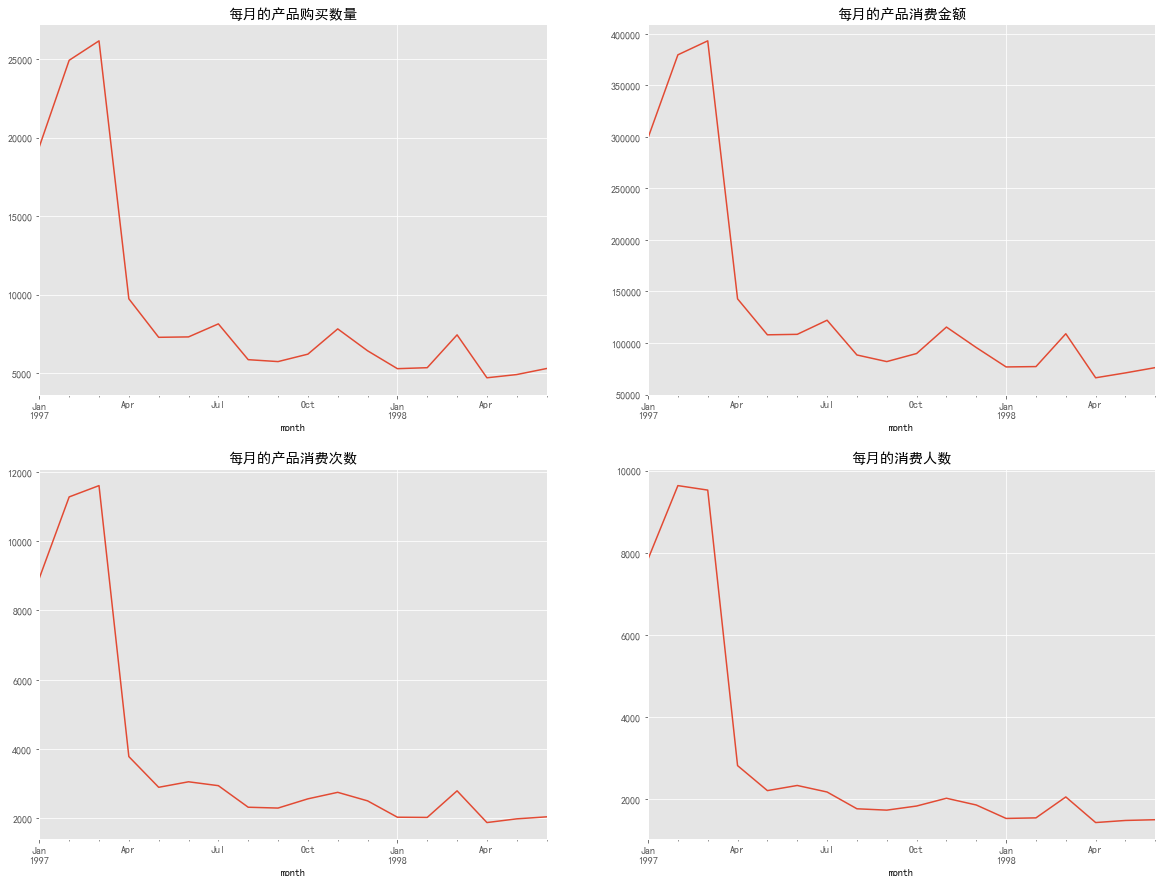

In [7]:
# 用户整体消费趋势分析（按照月份）
#为什么保留前面的年份信息：需要考虑年份信息
# 按月份统计产品购买数量、消费金额、消费次数、消费人数
plt.figure(figsize=(20,15))
#每月的产品购买数量
plt.subplot(221) #两行两列，占据第一个位置
df.groupby(by='month')['order_products'].sum().plot()
plt.title('每月的产品购买数量')
#每月的消费金额
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('每月的产品消费金额')
# 每月的消费次数
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的产品消费次数')
# 每月的消费人数（根据user_id进行去重统计，在计算个数）
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot() #x.drop_duplicates去重重复值，之后再计算长度
plt.title('每月的消费人数')

- 第一幅图
    - 前三个月的销量很高，而以后销量比较稳定，并且稍微有下降的趋势，猜测是春节前后的销量高，或者公司搞了一些活动
    - 前三个月的销量在23000左右
- 图二
    - 前三个月的销售金额 很高，与消费数量呈正比关系，后面比较稳定并且稍微有下降的趋势，这是因为销量很高，猜测一：与月份有关，在我国1，2，3正处于春节前后，猜测二：1，2，3月份公司是否加大了营销力度
- 图三
    - 可以看出前三个月的订单数在一万左右，后面月份大概在2500左右
- 图四
    - 消费人数在前三个月在
- 总结：所有数据显示，97年前三个月消费事态异常，后续区域常态

##### 用户个体消费信息
- 

1. 用户消费金额、消费次数（产品数量）描述统计

In [8]:
user_grouped=df.groupby(by='user_id').sum()
print(user_grouped.describe())
print('用户数量:',len(user_grouped))

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量: 23570


C:\Users\23665\AppData\Local\Temp\ipykernel_18496\895928282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_grouped=df.groupby(by='user_id').sum()


- order_products:可以看到是右偏分布，用户数量为23570个，每个用户平均购买7个CD，但是中位数只有3，并且最大购买量是1033，平均数大于中位数，属于典型的右偏分布
- 消费金额（ order_amount）：结合分位数最大值来看是右偏分布，也就是绝大多数人消费少，但是后面25%的用户对平均值的贡献率比较大，也就是存在土豪用户13990，结合分位数与最大值来看，平均数与75%分位数几乎相等，属于典型的右偏分布，说明存在小部分用户（后面25%）高额消费，只有这样才能使平均值维持在106左右

<Axes: xlabel='order_products', ylabel='order_amount'>

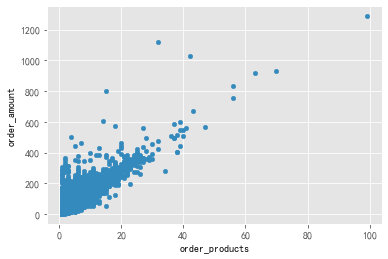

In [4]:
#绘制产品的购买量(x轴)与消费金额（y轴）
df.plot(kind='scatter',x='order_products',y='order_amount')



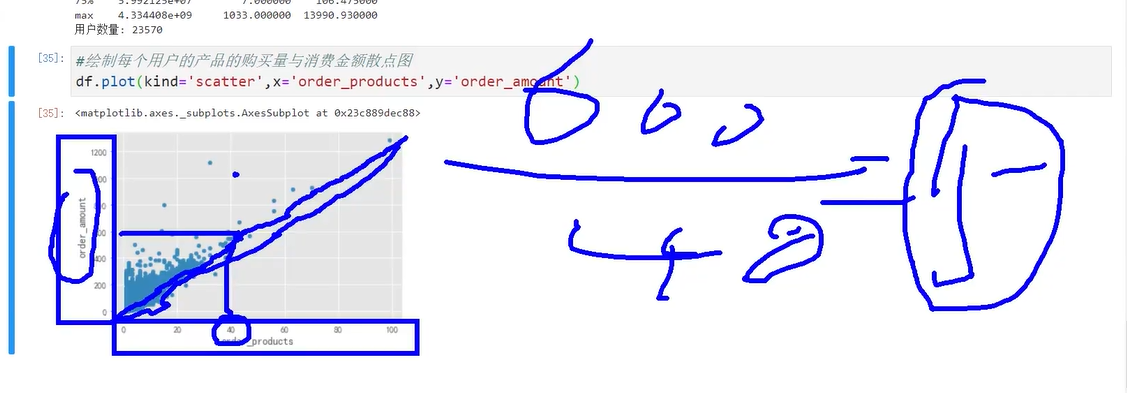
- 从图中可以知道，用户的消费金额与购买量呈现线性趋势，并且商品的均价在15左右，并且存在较少的极值点，大概5个极值点（消费金额大于1000或者购买量大于60），对于样本来说影响不大，可以忽略不记

- 7.5 用户个体消费分析--消费金额分布与贡献率

<Axes: xlabel='每个用户购买的数量', ylabel='Frequency'>

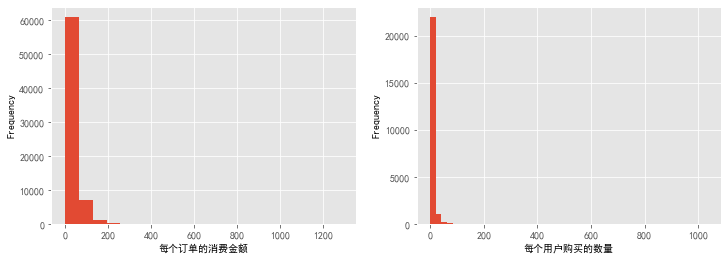

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=20) #bins是区间分数，影响柱子宽度，值越大柱子越细。宽度=（列最大值-最小值）/bins
#消费金额在100以内的人数占据了绝大多数

plt.subplot(122)
plt.xlabel('每个用户购买的数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=50)
#结果：图二可以知道用户购买数量非常小集中在50以内
#两幅图得知，我们的用户主要是消费金额第并且购买小于50的用户人数占比绝大多数（在电商领域正常闲心）

3. 用户累计消费金额占比分析（用户的贡献度）

In [6]:
# 进行用户分组，取出消费金额，进行求和汇总，排序，重置索引
user_cumsum=df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum
#前几名的order_amount累加求和除以总和
#累加求和

user_id  order_amount
0        10175          0.00
1         4559          0.00
2         1948          0.00
3          925          0.00
4        10798          0.00
...        ...           ...
23565     7931       6497.18
23566    19339       6552.70
23567     7983       6973.07
23568    14048       8976.33
23569     7592      13990.93

[23570 rows x 2 columns]

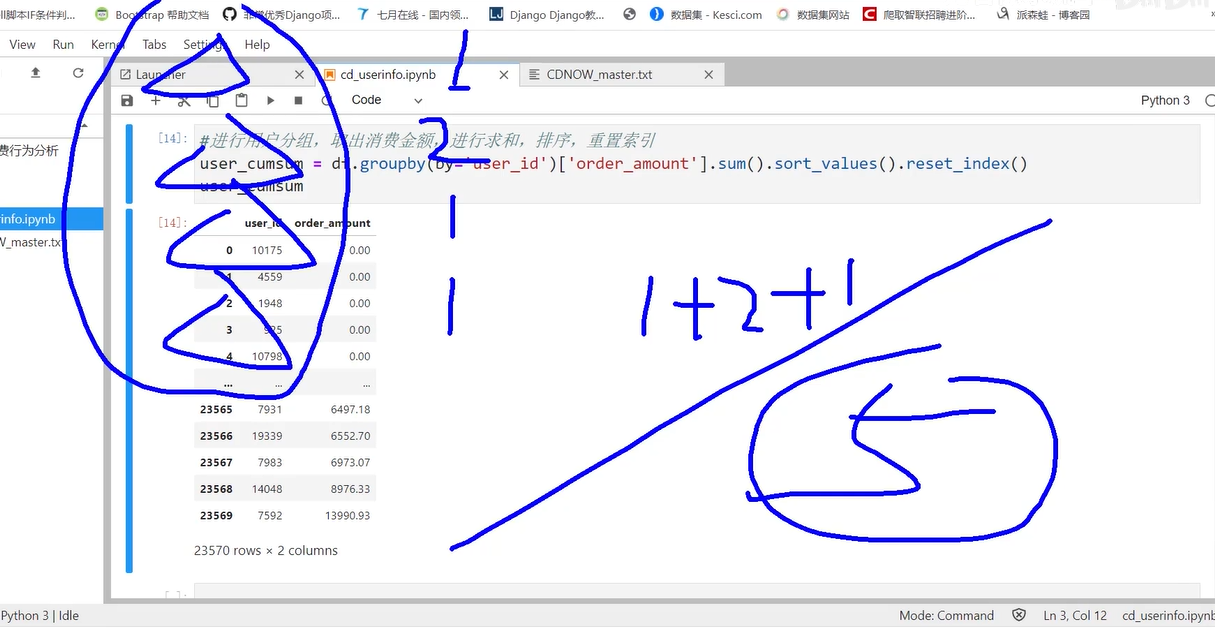

In [7]:
# 每个用户消费金额累加
# 举例
a=[1,2,3,4,5,6,7]
print(np.cumsum(a))

[ 1  3  6 10 15 21 28]


In [8]:
user_cumsum['amount_cumsum']=user_cumsum['order_amount'].cumsum() #cumsum()表示连续累加
user_cumsum.tail()

user_id  order_amount  amount_cumsum
23565     7931       6497.18     2463822.60
23566    19339       6552.70     2470375.30
23567     7983       6973.07     2477348.37
23568    14048       8976.33     2486324.70
23569     7592      13990.93     2500315.63

In [14]:
# 消费金额总值：
amount_total=user_cumsum['amount_cumsum'].max()
#前多少名用户的总贡献率
user_cumsum['prop']=user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1) #x表示一整行数据,axis=1表示按照行拼接#贡献率
user_cumsum.tail()

user_id  order_amount  amount_cumsum      prop
23565     7931       6497.18     2463822.60  0.985405
23566    19339       6552.70     2470375.30  0.988025
23567     7983       6973.07     2477348.37  0.990814
23568    14048       8976.33     2486324.70  0.994404
23569     7592      13990.93     2500315.63  1.000000

<Axes: >

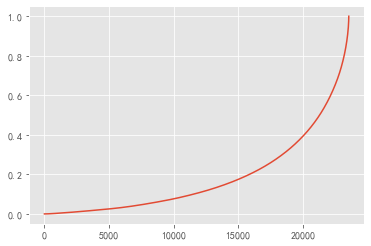

In [15]:
user_cumsum['prop'].plot()
#横轴可以理解成用户数量，y轴是贡献度

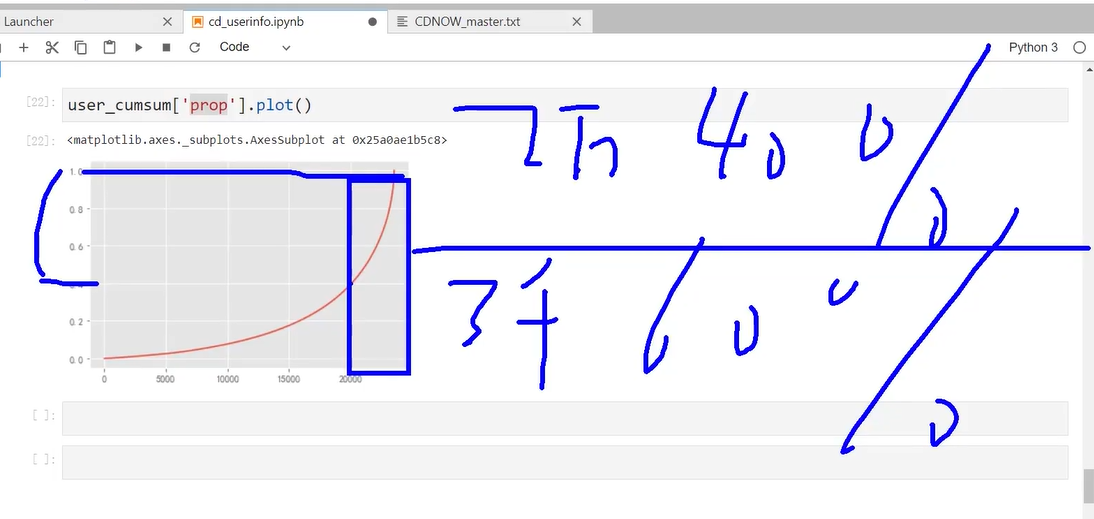
- 结果分析
    - 前2万名用户贡献了总金额的40%，剩余3500域名用户贡献了60%（2/8原则）

- 用户消费行为
1. 首购时间

<Axes: >

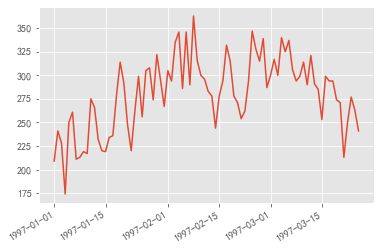

In [16]:
# 用户分组-->取最小值即为首购时间
#A用户 1997-1-1
#B用户 1997-1-1
#在1997-1-1首次购买有两个用户
df.groupby(by='user_id')['order_date'].min().value_counts().plot() #求首购时间
#value_counts().表示对分组之后的值进行绘图
#y轴是用户的数量，横坐标是首次购买时间


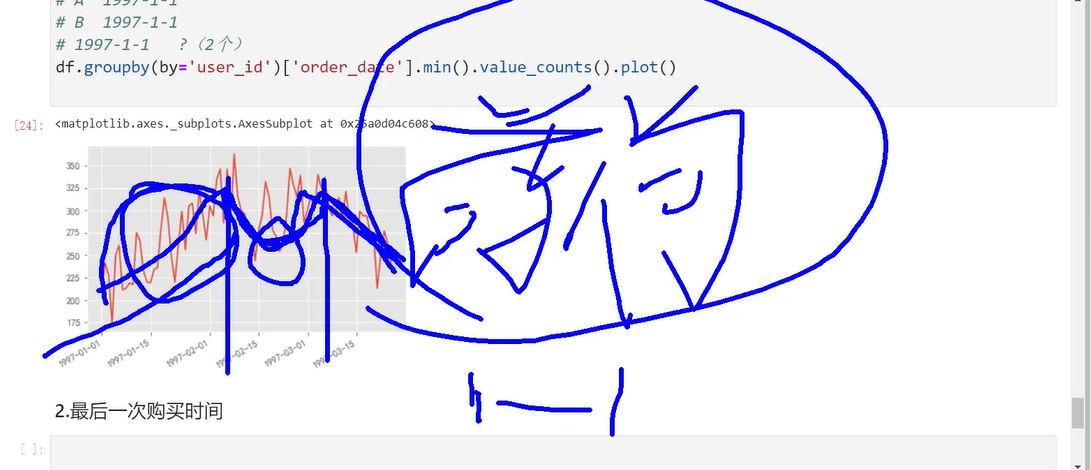
- 根据图可以知道首次购买的用户量在1月1号-2.10号呈现明显上升趋势，后续开始逐步下降，猜测：由科恩斯公司产品的推广力度或者价格的调整

2. 最后一次购买时间

<Axes: >

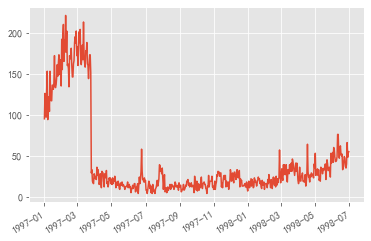

In [17]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()
#大多数用户最后一次购买时间集中在前3个月，说明缺少忠诚客户
#随着时间的推移，最后一次购买商品的用户量呈现上升的趋势，猜测：这份数据选择的是前3个月消费的用户在后面18个月的跟踪记录

- 用户分层
1. 构建RFM模型

In [18]:
#透视表的使用（index：相当于groupby分组，并且取出values中的数据列，aggfunc:key值必须存在于values中，并且必须跟随有效的聚合函数）
rfm=df.pivot_table(index='user_id',
                   values=['order_products','order_amount','order_date'],
                  aggfunc={
                      'order_date':'max', #最后一次购买
                      'order_products':'max',
                      'order_amount':'sum' #消费总金额
                      
                  })
rfm.head()

order_amount order_date  order_products
user_id                                         
1               11.77 1997-01-01               1
2               89.00 1997-01-12               5
3              156.46 1998-05-28               5
4              100.50 1997-12-12               2
5              385.61 1998-01-03               4

In [19]:
#R=每个用户最后一次消费时间-所有用户的最近一次消费时间（日期列的最大值）--> 最后转成天数，最后保留一位小数。也就是最大的时间
rfm['R']=(rfm['order_date'].max()-rfm['order_date'])/np.timedelta64(1,'D') #精确到天，并且保留一位小数，也就是1.5天等
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True) #order_products可以一定程度上反应频数

rfm.head()

M order_date  F      R
user_id                             
1         11.77 1997-01-01  1  545.0
2         89.00 1997-01-12  5  534.0
3        156.46 1998-05-28  5   33.0
4        100.50 1997-12-12  2  200.0
5        385.61 1998-01-03  4  178.0

In [20]:
#RFM计算方式：每一列的数据减去数据所在列的平均值，有正有负，根据结果值与0做比较，如果>=0,设置为1，否则0
#RFM中R=1,F=0,M=0对应的是一般挽留客户
#rfm['R']-rfm['R'].mean() #计算单个R的
def rfm_func(x):  #x:分别代表每一列的数据
    level=x.apply(lambda x:'1' if x>=1 else '0')
    label =level['R']+level['F']+level['M'] #距离：100，001
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户',
    }
    result=d[label]
    return result
#rfm[['R','F','M']].apply(lambda x:x-x.mean()) #每个值减去所在列的平均值计算所有的R,F,M的值
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

M order_date  F      R   label
user_id                                     
1         11.77 1997-01-01  1  545.0  一般发展客户
2         89.00 1997-01-12  5  534.0  一般价值客户
3        156.46 1998-05-28  5   33.0  重要保持客户
4        100.50 1997-12-12  2  200.0  一般挽留客户
5        385.61 1998-01-03  4  178.0  重要保持客户

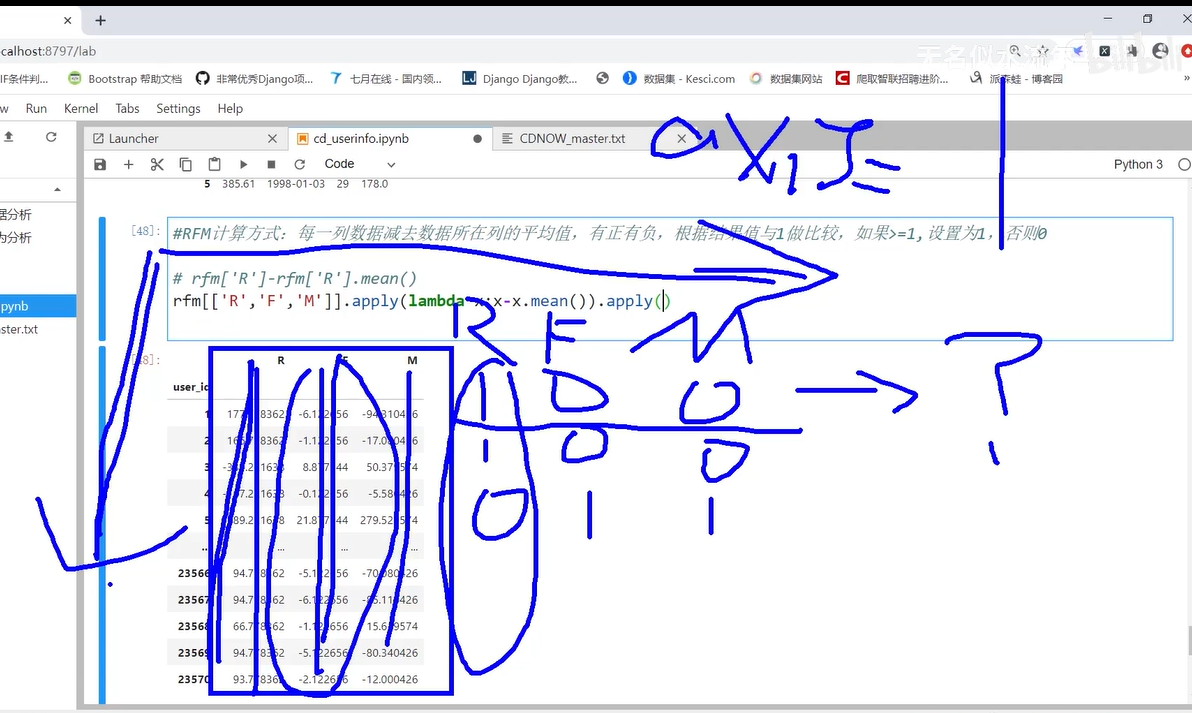

Text(0, 0.5, 'R')

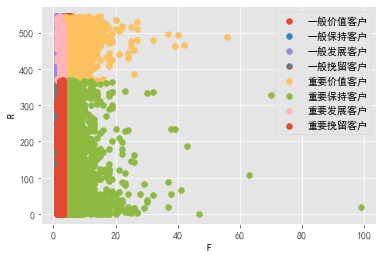

In [21]:
# 客户分层可视化
for label,grouped in rfm.groupby(by='label'):
    #print(label,group)
    x = grouped['F'] #单个用户的购买数量
    y=grouped['R']  #最后一次购买时间与98年7月的相差天数
    plt.scatter(x,y,label=label) #label表示
plt.legend()  #显示图例
plt.xlabel('F')
plt.ylabel('R')
#可以看出中要保持客户占比还是很多的，

- 知道rfm的流程
- 用户分层--新用户、活跃用户、回流用户流失分析1
    - 新用户：第一次消费的用户
    - 活跃用户：老顾客在某一个时间窗口内有过消费
    - 不活跃用户：指在时间窗口内没有消过费的老客
    - 回流用户：相当于回头客的意思
    - 用户回流的动作分为自主回流与人工回流，自主回流指的是玩家自己回流了，而人工回流则是人为参与导致的
- 本次主要研究自主回流客户的分析
    

In [22]:
pivot_counts=df.pivot_table(
                    index='user_id',
                    columns='month',
                   values='order_dt',
                  aggfunc='count').fillna(0) #j将空值填充为0
pivot_counts

month    1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               1.0         0.0         0.0         0.0         0.0   
2               2.0         0.0         0.0         0.0         0.0   
3               1.0         0.0         1.0         1.0         0.0   
4               2.0         0.0         0.0         0.0         0.0   
5               2.0         1.0         0.0         1.0         1.0   
...             ...         ...         ...         ...         ...   
23566           0.0         0.0         1.0         0.0         0.0   
23567           0.0         0.0         1.0         0.0         0.0   
23568           0.0         0.0         1.0         2.0         0.0   
23569           0.0         0.0         1.0         0.0         0.0   
23570           0.0         0.0         2.0         0.0         0.0   

month    1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               0.0         0.0         0.0         0.0         0.0   
4               0.0         0.0         1.0         0.0         0.0   
5               1.0         1.0         0.0         1.0         0.0   
...             ...         ...         ...         ...         ...   
23566           0.0         0.0         0.0         0.0         0.0   
23567           0.0         0.0         0.0         0.0         0.0   
23568           0.0         0.0         0.0         0.0         0.0   
23569           0.0         0.0         0.0         0.0         0.0   
23570           0.0         0.0         0.0         0.0         0.0   

month    1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               2.0         0.0         0.0         0.0         0.0   
4               0.0         1.0         0.0         0.0         0.0   
5               0.0         2.0         1.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
23566           0.0         0.0         0.0         0.0         0.0   
23567           0.0         0.0         0.0         0.0         0.0   
23568           0.0         0.0         0.0         0.0         0.0   
23569           0.0         0.0         0.0         0.0         0.0   
23570           0.0         0.0         0.0         0.0         0.0   

month    1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               0.0         0.0         0.0  
2               0.0         0.0         0.0  
3               0.0         1.0         0.0  
4               0.0         0.0         0.0  
5               0.0         0.0         0.0  
...             ...         ...         ...  
23566           0.0         0.0         0.0  
23567           0.0         0.0         0.0  
23568           0.0         0.0         0.0  
23569           0.0         0.0         0.0  
23570           0.0         0.0         0.0  

[23570 rows x 18 columns]

In [23]:
# 由于浮点数不直观，并且需要转换成是否消费过即可，用0，1表示
df_purchase=pivot_counts.applymap(lambda x:1 if x>0 else 0) #直接对每一个元素进行判断
#apply:作用域dataframe中的一行或者一列数据，默认是整列操作，行需要按指定
#applymax:作用于dataframe数据中的每一个元素
#map()：本身是一个series的函数，在dataframe中没法使用map函数，map函数作用域series中的每一个元素的
df_purchase.head()

month    1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1                 1           0           0           0           0   
2                 1           0           0           0           0   
3                 1           0           1           1           0   
4                 1           0           0           0           0   
5                 1           1           0           1           1   

month    1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           1           0           0   
5                 1           1           0           1           0   

month    1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 1           0           0           0           0   
4                 0           1           0           0           0   
5                 0           1           1           0           0   

month    1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1                 0           0           0  
2                 0           0           0  
3                 0           1           0  
4                 0           0           0  
5                 0           0           0

In [24]:
#判断是否是新用户、活跃用户、不活跃用户、回流用户
#status存储的18个月的用户状态：unreg(没有消费)，new(第一次消费)，activate(第二次消费)，unactivate(activate之后不再消费)，return（unactivate之后又消费了）

def active_status(data):
    status=[]
    #本月没有消费
    for i in range(18):
        if data[i]==0:
            if len(status)==0: #表示前面没有记录，也就是97年1月份的数据
                status.append('unreg')
            else: #判断上一个月的状态
                if status[i-1]=='unreg': #也就是一直没有消费过
                    status.append('unreg')
                else: #new/activate/unactivate/return 
                    status.append('unactivate') #不管上个月是否消费国，本月都是不活跃用户
        #本月有消费
        else:
            if len(status)==0: #前面没有任何记录（97年1月）
                status.append('new') #第一次消费
            else:
                if status[i-1]=='unactivate':
                    status.append('return') #本月消费，上个月没消费
                elif status[i-1]=='unreg':
                    status.append('new')
                else:#new/activate/return
                    status.append('activate')
    return pd.Series(status,df_purchase.columns) #值status,列明df_purchase中的列名
                
        
    
    
purchase_status=df_purchase.apply(active_status,axis=1)
purchase_status.head()

month   1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                              
1              new  unactivate  unactivate  unactivate  unactivate   
2              new  unactivate  unactivate  unactivate  unactivate   
3              new  unactivate      return    activate  unactivate   
4              new  unactivate  unactivate  unactivate  unactivate   
5              new    activate  unactivate      return    activate   

month    1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1        unactivate  unactivate  unactivate  unactivate  unactivate   
2        unactivate  unactivate  unactivate  unactivate  unactivate   
3        unactivate  unactivate  unactivate  unactivate  unactivate   
4        unactivate  unactivate      return  unactivate  unactivate   
5          activate    activate  unactivate      return  unactivate   

month    1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1        unactivate  unactivate  unactivate  unactivate  unactivate   
2        unactivate  unactivate  unactivate  unactivate  unactivate   
3            return  unactivate  unactivate  unactivate  unactivate   
4        unactivate      return  unactivate  unactivate  unactivate   
5        unactivate      return    activate  unactivate  unactivate   

month    1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1        unactivate  unactivate  unactivate  
2        unactivate  unactivate  unactivate  
3        unactivate      return  unactivate  
4        unactivate  unactivate  unactivate  
5        unactivate  unactivate  unactivate

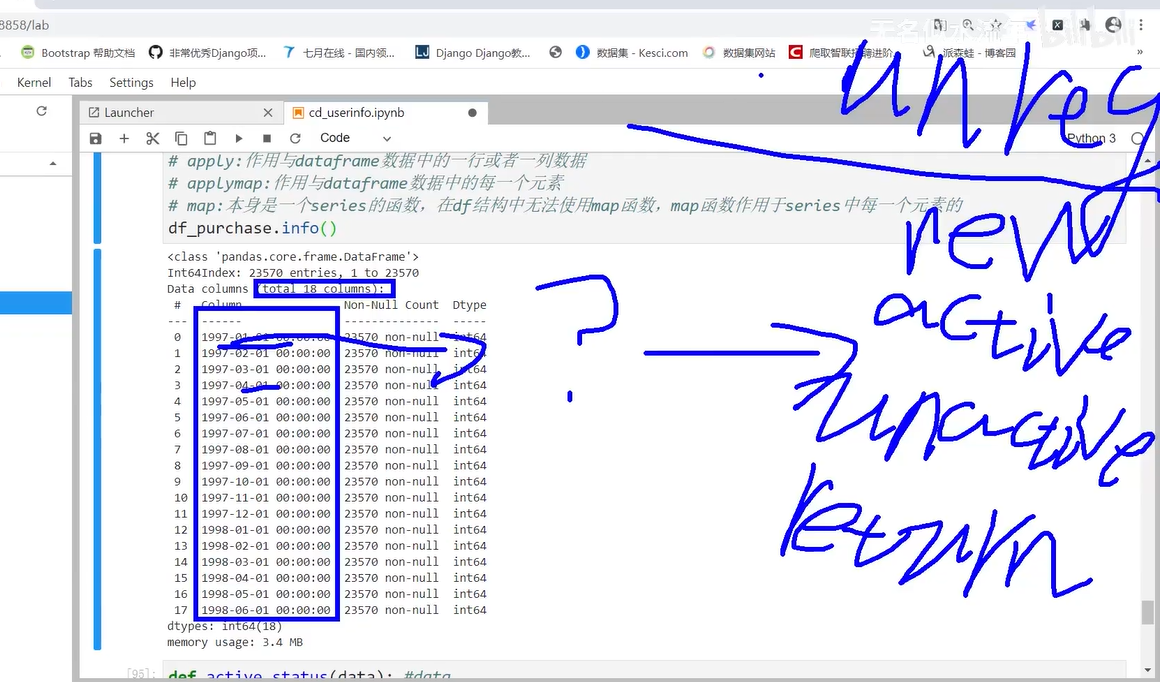
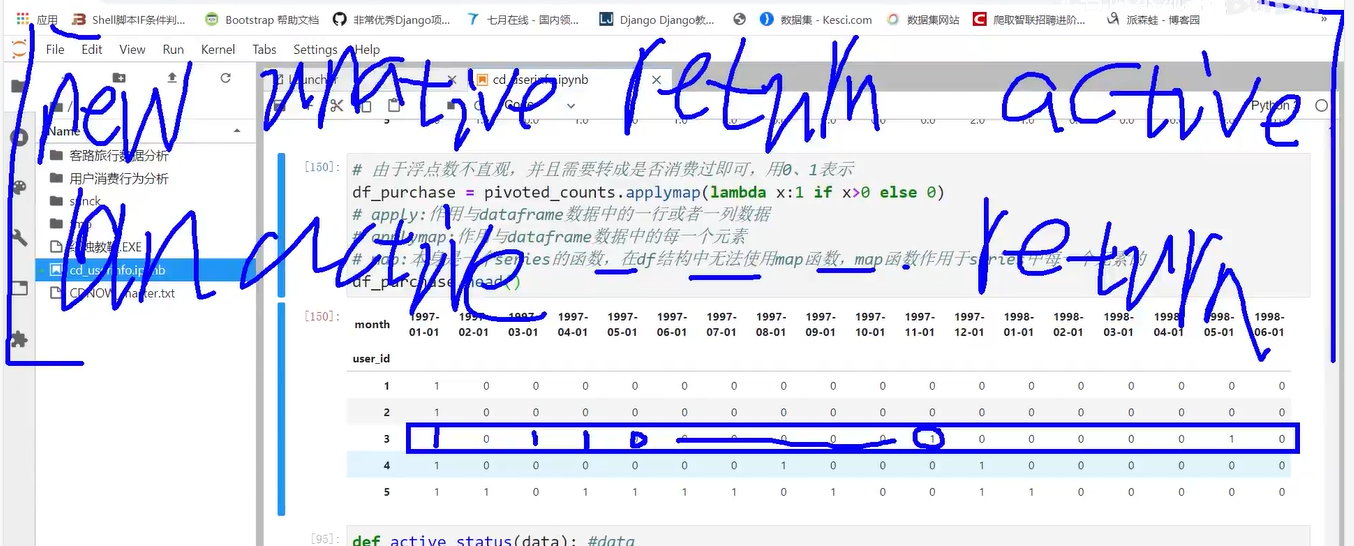
- new
- activate
- unactivate
- return 
- unreg：指的只是注册但没有任何消费的用户

In [25]:
#因为不分析unreg用户，所以用NAN替换unreg
purchase_status_ct=purchase_status.replace('unreg',np.NaN)

#统计97年1月份的回流用户
purchase_status_ct=purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct.head(60)


month       1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
activate           NaN      1157.0        1681      1773.0       852.0   
new             7846.0      8476.0        7248         NaN         NaN   
return             NaN         NaN         595      1049.0      1362.0   
unactivate         NaN      6689.0       14046     20748.0     21356.0   

month       1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
activate         747.0       746.0       604.0       528.0       532.0   
new                NaN         NaN         NaN         NaN         NaN   
return          1592.0      1434.0      1168.0      1211.0      1307.0   
unactivate     21231.0     21390.0     21798.0     21831.0     21731.0   

month       1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
activate         624.0       632.0       512.0       472.0       571.0   
new                NaN         NaN         NaN         NaN         NaN   
return          1404.0      1232.0      1025.0      1079.0      1489.0   
unactivate     21542.0     21706.0     22033.0     22019.0     21510.0   

month       1998-04-01  1998-05-01  1998-06-01  
activate         518.0       459.0       446.0  
new                NaN         NaN         NaN  
return           919.0      1029.0      1060.0  
unactivate     22133.0     22082.0     22064.0

<Axes: xlabel='month'>

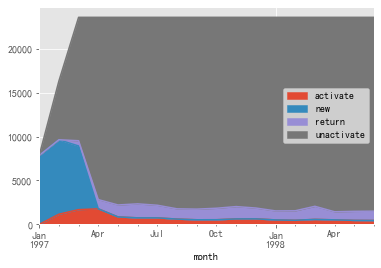

In [26]:
#在数据可视化之前将NA替换成0才可以
purchase_status_ct.T.fillna(0).plot.area() #行列变换
# 根据图像分析可知：前三个月红色活跃用户，蓝色新用户占比较大
#四月份过后，新用户和活跃用户开始下降，并且呈现稳定趋势，伴是稳定用户，需要重点关注
#回流用户主要产生在4月过后，呈现稳定趋势，是网站的重要客户

KeyError: 'active'

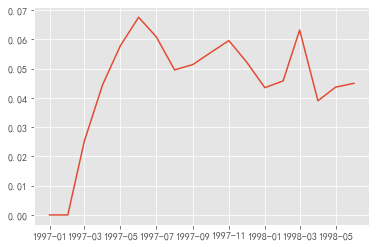

In [27]:
# 回流用户（return）的占比:return在本月中有多少人/总的人数
rate=purchase_status_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
rate
plt.plot(rate['return'],label='return')
plt.plot(rate['active'],label='active')
plt.legend()
#回流用户：前五个月回流用户上涨，过后呈现下降趋势，平均呆在5%比例
#活跃用户：前三个月活跃用户大量上涨，猜测由于活动引来很新用户导致，5月份之后开始下降，平均呆在2.5%z左右
#在稳定期间回流用户占比大于活跃用户

- 用户购买周期
    - 相邻购买时间的插值，可能有多个值

In [ ]:
# shift函数：将数据移动到一定的位置
data1=pd.DataFrame({
    'a':[0,1,2,3,4,5],
    'b':[5,4,3,2,1,0]
})
data1.shift(axis=0) #整体向下移动一个位置
data1.shift(axis=1)


In [28]:
# 计算购买周期（购买时间的时间差）
order_diff=df.groupby(by='user_id').apply(lambda x:x['order_date']-x['order_date'].shift()) #d当前订单日期-上一次订单日期
order_diff.head()
#第2个用户购买了两次，在同一天内购买
order_diff.describe()
#大多数人的购买周期在100天以内

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

<Axes: >

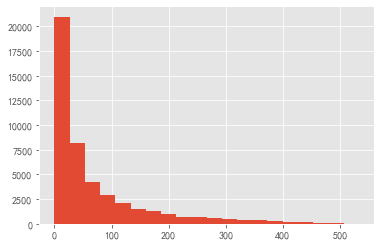

In [29]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
#得知平均消费周期是68
# 绝大多数用户的消费周期低于100天
#呈现典型的长尾分布，只有下部分的消费周期在200天以上（不积极用户），可以在这批用户消费三天后进行电话回访或者短信赠送优惠券活动，增大回访率

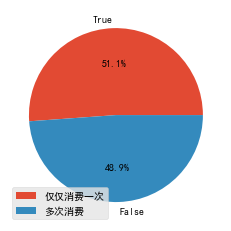

In [30]:
# 生命周期：第一次购买于最后一次购买的时间差，如果为0说明用户仅仅够买了一次
user_life=df.groupby('user_id')['order_date'].agg(['min','max']) #agg同时求最大值和最小值
#仅仅购买一次用户的比例
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%') #格式化成1为小数
plt.legend(['仅仅消费一次','多次消费'])
#说明一半以上的用户仅仅消费了一次，说明运营部里，留存率不好

In [31]:
(user_life['max']-user_life['min']).describe() #生命周期分析
#生命周期越大越好
#结果：用户平均生命周期是134天但是中位数为0，再次验证了绝大多数用户消费了一次
#75%分位数以后的用户，生命周期》294天，属于核心用户，需要着重维持
#前三个月的新用户数据，所以分析的是这新用户的生命周期


count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object


-  绘制所有用户生命周期直方图+多次消费用户（2次以及以上）


Text(0, 0.5, '用户人数')

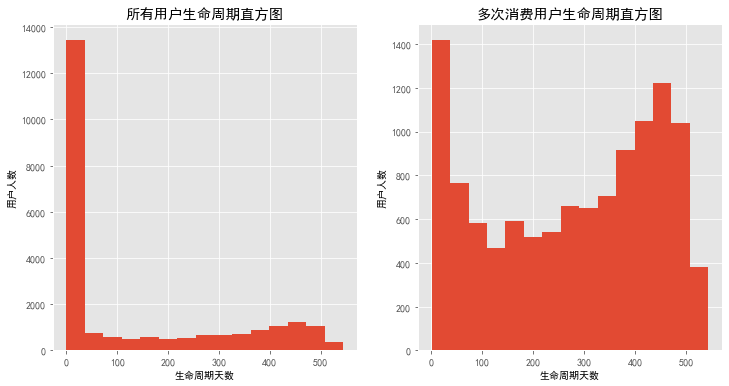

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')
plt.subplot(122)
# 多次消费用户的直方图
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D') #取出时间差哪一列
u_1[u_1>0].hist(bins=15) #找到生命周期大于0的
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

- 忠诚客户的生命周期在300-500之间
- 对比可知：第二幅图过滤掉了生命周期==0的用户，呈现双峰结构
- 虽然图二中还有一部分的用户生命周期区域0天，但是比第一幅图好了很多，虽然进行了多次消费，但是不是长期的来消费，属于普通用户，可针对性的进行营销推广活动
- 少部分的用户生命周期在300-500天属于忠诚客户，需要大力维护此类用户

##### 复购率和回购率分析
- 复购率分析：
    - 在自然月（一个月，2个月等）购买多次的用户在总消费人数中的占比（如果客户在同一天消费了多次，也成为复购用户）
- 消费者有三钟
    - 消费记录大于等于2的（复购用户）
    - 消费记录只有一次的（非复购用户）
    - 本月无消费用户（无消费用户）

### 计算方式：
[![2023-10-12-192019.png](https://i.postimg.cc/yxRKwJqz/2023-10-12-192019.png)](https://postimg.cc/JHRSXz4T)
- 复购用户：复购人数除以总人数

<Axes: xlabel='month'>

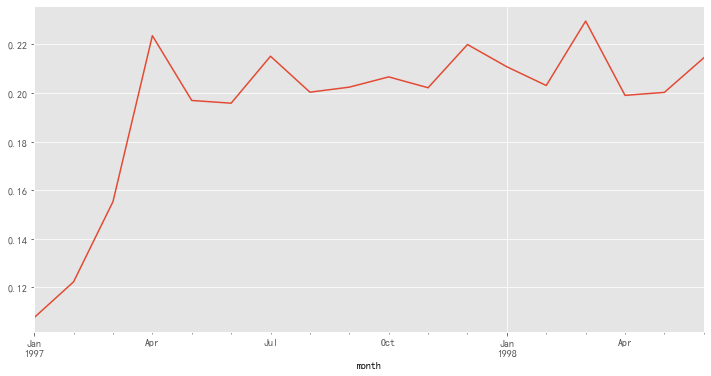

In [37]:
# 复购用户：用1来表示），
# 非复购的消费用户：0
# 自然月没有消费记录的用户：NaN（在count的时候不参与计算）
purchase_r=pivot_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()
# 复购率的计算：所有的复购用户除以总人数
purchase_r.sum()  #求出复购用户
purchase_r.count() #求出所有参与购物的用户（NAN不参与计数）
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))
# 结论：前三个月的复购率逐步上升，后续趋于平稳，维持在20%-22%之间
# 原因：分析前三个月复购率低得原因可能是因为大批新用户仅仅购买一次造成的

- 回购率分析
    - 计算方式：一个时间窗口内进行了消费，在下一个窗口内又进行了消费（这里的时间窗口是一个月）
    - 在一月份消费，二月份消费说明在一月份是回购用户，如果二月份没有消费说明不是回购用户

In [39]:
def purchase_back(data):
    status=[] #存储用户回购率状态
    #1：回购用户
    #0：非回购用户（当前月份消费了，下个月没有消费）
    #NaN:当前月没有消费
    for i in range(17): #是17，因为18个月，最后一个月没有记录，设置为NaN，因为下一个月的数据不存在
        #当前月份消费了
        if data[i]==1:
            if data[i+1]==1:
                status.append(1) #回购用户
            elif data[i+1]==0: #下个月没有消费
                status.append(0)
        else: #当前余额没有消费
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,df_purchase.columns)
purchase_b=df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

month    1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               0.0         NaN         NaN         NaN         NaN   
2               0.0         NaN         NaN         NaN         NaN   
3               0.0         NaN         1.0         0.0         NaN   
4               0.0         NaN         NaN         NaN         NaN   
5               1.0         0.0         NaN         1.0         1.0   

month    1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               NaN         NaN         NaN         NaN         NaN   
4               NaN         NaN         0.0         NaN         NaN   
5               1.0         0.0         NaN         0.0         NaN   

month    1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               0.0         NaN         NaN         NaN         NaN   
4               NaN         0.0         NaN         NaN         NaN   
5               NaN         1.0         0.0         NaN         NaN   

month    1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               NaN         NaN         NaN  
2               NaN         NaN         NaN  
3               NaN         0.0         NaN  
4               NaN         NaN         NaN  
5               NaN         NaN         NaN

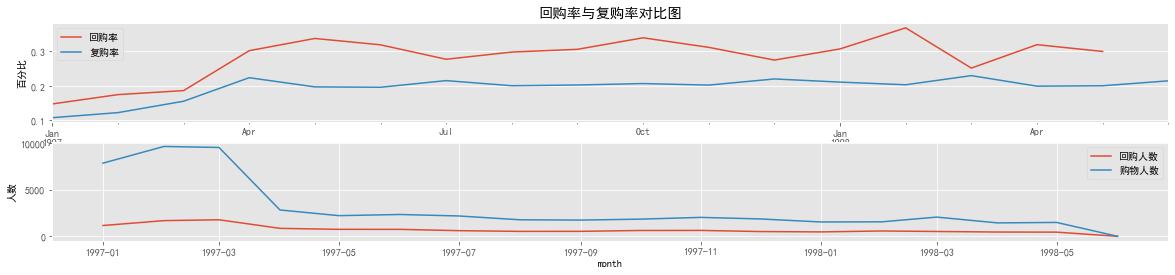

In [43]:
# 数据可视化
plt.figure(figsize=(20,4))
plt.subplot(211)
#回购率
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
#复购率：purchase_r 
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比')
plt.title('回购率与复购率对比图')
#回购率可以知道在平稳后在30%左右，波动性稍微较大
#复购率低于回购率，平稳后在20%左右，波动率较小
#前三个月不管是回购还是复购都呈现上升趋势，说明新用户需要一定时间变成复购或者回购用户
#结合新老用户分析，新客户的忠诚度原低于老客户的忠诚度

#回购人数与购物总人数
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()
#前三个月的购物总人数远远大于回购人数，主要是因为很多新用户在1月份进行了首次购买，三个月过后回购用户和购物总人数开始稳定，
#回购人数稳定在1000左右，购物总人数在2000左右

#### 结论
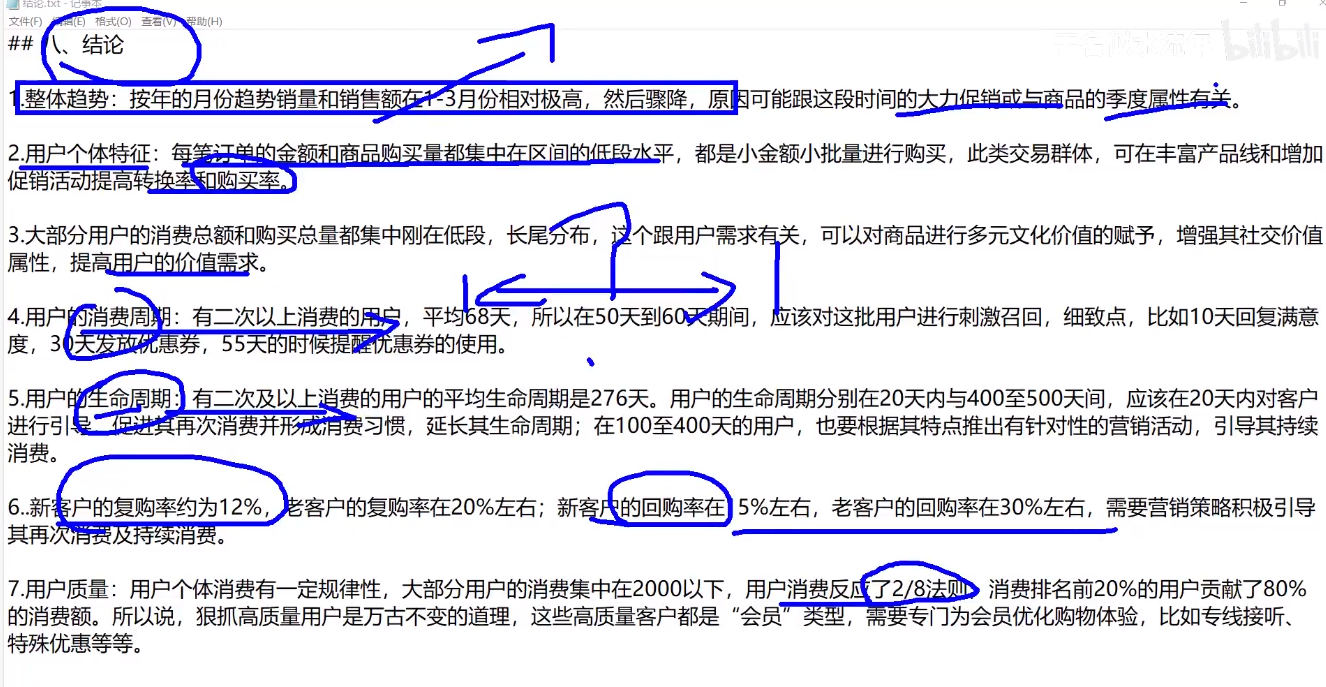
#### 用户行为消费分析方法总结（对于用户行为消费分析的分析思路主要是以下三步）：
1. 针对用户进行按照月份进行整体和个体分析，主要分析维度是人数，消费金额，购买量
2. 消费分析：收购时间，最后一次购买分析，相邻的两个购物时间的间隔，用户分层（RFM模型+数据透视表），分析维度主要是新用户，活跃用户，不活跃用户流失分析，回流用户比
3. 复购率和回购率进行分析
